In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
dataset=pd.read_csv('movies.csv')
dataset.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [11]:
dataset.describe()

,RATING,RunTime
count,8179.000000,7041.000000
mean,6.921176,68.688539
std,1.220232,47.258056
min,1.100000,1.000000
25%,6.200000,36.000000
50%,7.100000,60.000000
75%,7.800000,95.000000
max,9.900000,853.000000


In [15]:
dataset.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime        0
Gross       9539
dtype: int64

In [14]:
dataset['RunTime'].fillna(dataset['RunTime'].mode()[0],inplace=True)

C:\Users\Surender kaushik\AppData\Local\Temp\ipykernel_10096\725935723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['RunTime'].fillna(dataset['RunTime'].mode()[0],inplace=True)


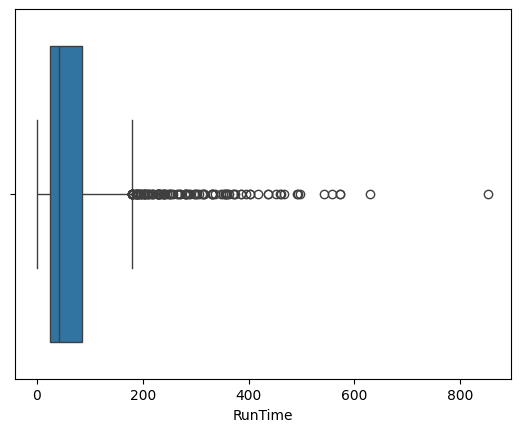

In [20]:
sns.boxplot(x="RunTime",data=dataset) #calculating outliers and black dots are outlier data
plt.show()                        # this is called boxplot method or graph

C:\Users\Surender kaushik\AppData\Local\Temp\ipykernel_10096\1787417255.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["RunTime"])


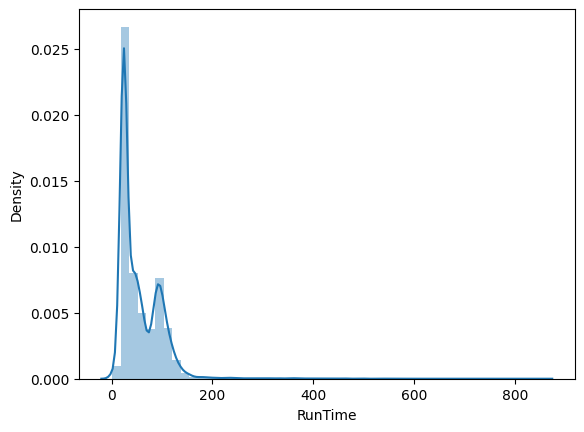

In [21]:
sns.distplot(dataset["RunTime"]) # this is called distribution box method and the tail of graph is extending so much it show outliers 
plt.show()

OUTLIER REMOVING METHODS 

METHOD 1: IQR 

In [22]:
dataset.shape


(9999, 9)

In [30]:
q1=dataset["RunTime"].quantile(0.25)


q1

np.float64(36.0)

In [31]:
q3=dataset["RunTime"].quantile(0.75)
q3

np.float64(95.0)

In [32]:
IQR=q3-q1

In [33]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
min_range,max_range

(np.float64(-52.5), np.float64(183.5))

In [35]:
new_ds=dataset[dataset["RunTime"]<max_range]

In [36]:
new_ds

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",50.0,NaN
...,...,...,...,...,...,...,...,...,...
9960,Sexify,(2021– ),"\nComedy, Drama",7.1,\nAfter facing their parents at Easter breakfa...,\n Director:\nKalina Alabrudzinska\n| \n ...,103,37.0,NaN
9961,Sexify,(2021– ),"\nComedy, Drama",6.9,\nAfter getting an anonymous tip about the cop...,\n Director:\nKalina Alabrudzinska\n| \n ...,96,40.0,NaN
9962,Sexify,(2021– ),"\nComedy, Drama",7.1,\nThe big pitch at the university tech competi...,\n Director:\nKalina Alabrudzinska\n| \n ...,100,47.0,NaN
9963,Castlevania,(2017–2021),"\nAnimation, Action, Adventure",8.2,\nLenore urges Hector to not test Camilla's pa...,\n Director:\nSam Deats\n| \n Stars:\nRi...,911,24.0,NaN


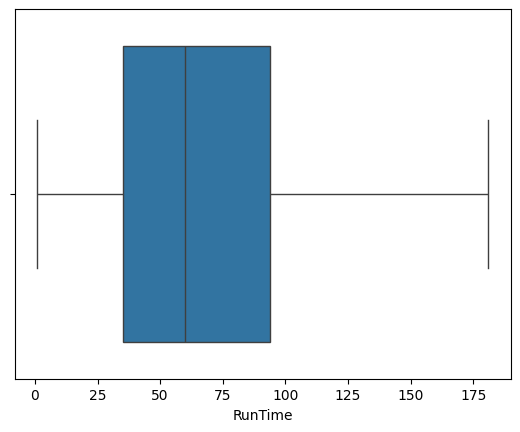

In [37]:
sns.boxplot(x="RunTime",data=new_ds)
plt.show()

METHOD 2 : Z SCORE

In [40]:
dataset.isnull().sum()

MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime        0
Gross       9539
dtype: int64

In [39]:
dataset['RunTime'].fillna(dataset['RunTime'].mode()[0],inplace=True)

C:\Users\Surender kaushik\AppData\Local\Temp\ipykernel_10096\725935723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['RunTime'].fillna(dataset['RunTime'].mode()[0],inplace=True)


In [41]:
min_range=dataset['RunTime'].mean()-(3*dataset['RunTime'].std())
max_range=dataset['RunTime'].mean()+(3*dataset['RunTime'].std())

In [42]:
min_range,max_range

(np.float64(-78.31395131890525), np.float64(189.2506449882722))

In [44]:
new_ds1=dataset[dataset['RunTime']<max_range]

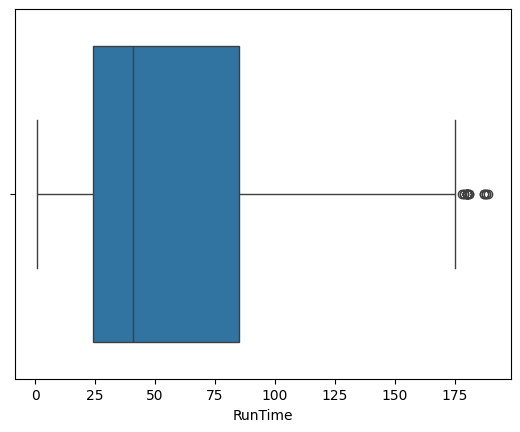

In [45]:
sns.boxplot(x='RunTime',data=new_ds1)
plt.show()

In [46]:
z_score=(dataset['RunTime']-dataset['RunTime'].mean())/(dataset['RunTime'].std())


In [49]:
z_score<3

0       True
1       True
2       True
3       True
4       True
        ... 
9994    True
9995    True
9996    True
9997    True
9998    True
Name: RunTime, Length: 9999, dtype: bool

In [50]:
dataset['z_score']=z_score

In [51]:
dataset

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,z_score
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN,1.469514
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN,-0.683237
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN,-0.257172
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN,-0.728086
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,24.0,NaN,-0.705662
...,...,...,...,...,...,...,...,...,...,...
9994,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n \n Stars:\nMorgan Taylor Camp...,NaN,24.0,NaN,-0.705662
9995,Arcane,(2021– ),"\nAnimation, Action, Adventure",NaN,\nAdd a Plot\n,\n,NaN,24.0,NaN,-0.705662
9996,Heart of Invictus,(2022– ),"\nDocumentary, Sport",NaN,\nAdd a Plot\n,\n Director:\nOrlando von Einsiedel\n| \n ...,NaN,24.0,NaN,-0.705662
9997,The Imperfects,(2021– ),"\nAdventure, Drama, Fantasy",NaN,\nAdd a Plot\n,\n Director:\nJovanka Vuckovic\n| \n Sta...,NaN,24.0,NaN,-0.705662
